In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
import matplotlib as mpl
from scipy.optimize import curve_fit
import scipy.constants as sc
from astropy.convolution import convolve, Box1DKernel
import stacking_functions as sf

In [2]:
# Open the data.
hdulist = fits.open('500hr.fits')
hi_data = hdulist[0].data[0]
hdulist.close()

In [3]:
# Fetch the galaxies to stack.
bin1_cat = sf.read_catalog('G10spec_z_chiles.txt', 1, '\t', (0,1,2,3,4,7,10,13), 960., 1130., True, 2.05, 2.65, 150.05, 150.65, [True, -1., 3.], [True, 9., 12.])

# Do the cubelet stacking.
bin1_stacked_cube = sf.stack_inpfile(bin1_cat, hi_data, [960., 1420.], 2, [600,600], 0.125, 150.35, 2.35, 0.)

# Create the stack as a cube.
sf.convert_stack_cube('HI_z_cubes/bluebin1.fits', bin1_stacked_cube,'500hr_45x64x64.fits')

You are attempting to stack 1173 galaxies.


In [4]:
# Fetch the galaxies to stack.
bin2_cat = sf.read_catalog('G10spec_z_chiles.txt', 1, '\t', (0,1,2,3,4,7,10,13), 1130., 1280., True, 2.05, 2.65, 150.05, 150.65, [True, -1., 3.], [True, 9., 12.])

# Do the cubelet stacking.
bin2_stacked_cube = sf.stack_inpfile(bin2_cat, hi_data, [960., 1420.], 2, [600,600], 0.125, 150.35, 2.35, 0.)

# Create the stack as a cube.
sf.convert_stack_cube('HI_z_cubes/bluebin2.fits', bin2_stacked_cube,'500hr_45x64x64.fits')

You are attempting to stack 363 galaxies.


In [5]:
# Fetch the galaxies to stack.
bin3_cat = sf.read_catalog('G10spec_z_chiles.txt', 1, '\t', (0,1,2,3,4,7,10,13), 1280., 1320., True, 2.05, 2.65, 150.05, 150.65, [True, -1., 3.], [True, 9., 12.])

# Do the cubelet stacking.
bin3_stacked_cube = sf.stack_inpfile(bin3_cat, hi_data, [960., 1420.], 2, [600,600], 0.125, 150.35, 2.35, 0.)

# Create the stack as a cube.
sf.convert_stack_cube('HI_z_cubes/bluebin3.fits', bin3_stacked_cube,'500hr_45x64x64.fits')

You are attempting to stack 27 galaxies.


In [6]:
# Fetch the galaxies to stack.
bin4_cat = sf.read_catalog('G10spec_z_chiles.txt', 1, '\t', (0,1,2,3,4,7,10,13), 1320., 1420., True, 2.05, 2.65, 150.05, 150.65, [True, -1., 3.], [True, 9., 12.])
# Do the cubelet stacking.
bin4_stacked_cube = sf.stack_inpfile(bin4_cat, hi_data, [960., 1420.], 2, [600,600], 0.125, 150.35, 2.35, 0.)

# Create the stack as a cube.
sf.convert_stack_cube('HI_z_cubes/bluebin4.fits', bin4_stacked_cube,'500hr_45x64x64.fits')

You are attempting to stack 11 galaxies.


In [10]:
# Calculate the masses.
bin1box = np.array([[29,35],[30,36],[10,11]])
bin1mass = sf.HImass_calc('HI_z_cubes/bluebin1_final.fits', bin1box, 4.5, 4.5, 2.0, 52.765)

bin2box = np.array([[31,37],[30,35],[9,11]])
bin2mass = sf.HImass_calc('HI_z_cubes/bluebin2_final.fits', bin1box, 4.5, 4.5, 2.0, 52.765)

bin1box = np.array([[30,36],[31,37],[8,11]])
bin3mass = sf.HImass_calc('HI_z_cubes/bluebin3_final.fits', bin1box, 4.5, 4.5, 2.0, 52.765)

bin1box = np.array([[29,40],[29,35],[8,13]])
bin4mass = sf.HImass_calc('HI_z_cubes/bluebin4_final.fits', bin1box, 4.5, 4.5, 2.0, 52.765)

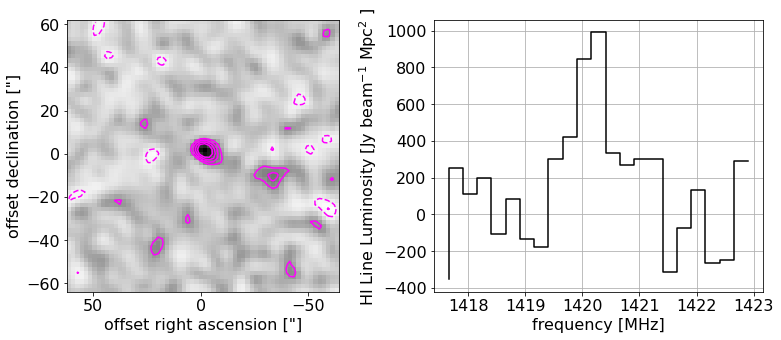

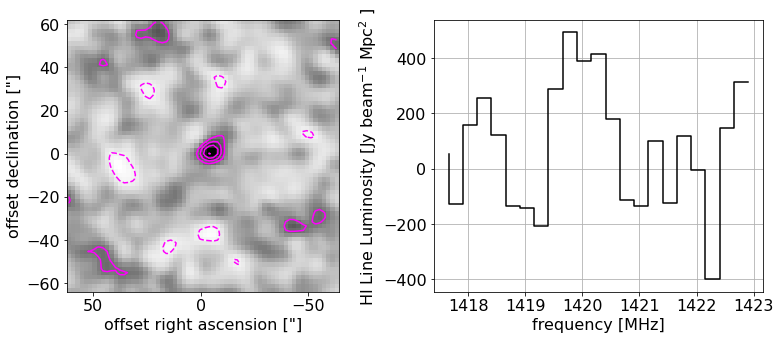

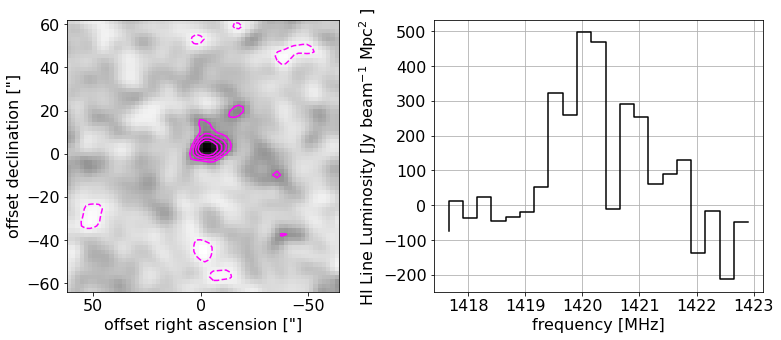

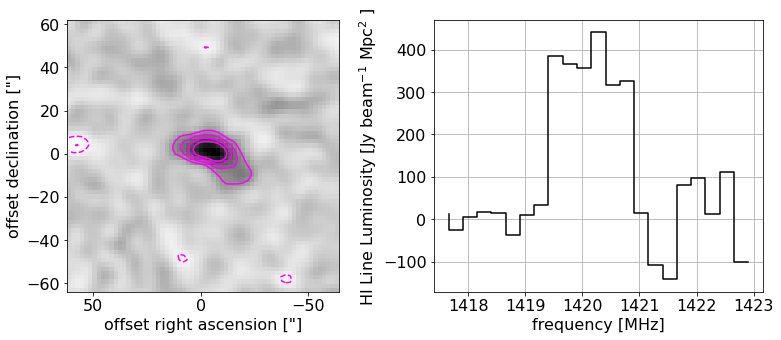

In [17]:
# Create the QA-type plots.
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['figure.figsize'] = (13,5)

# Do the calculations for the plots.
hdulist = fits.open('HI_z_cubes/bluebin1_final.fits')
imgdata = hdulist[0].data[0]
hdulist.close()

img = np.sum(imgdata[10:12,:,:], axis=0)
imgstd = np.std(img)
spectrum = np.sum(imgdata[:,29:35,30:36], axis=(1,2))
freq = np.linspace(1417.65575, 1422.90575, 22)
fig, ax = plt.subplots(2,1)

ax[0] = plt.subplot(1,2,1)
ax[0].contour(img, levels=imgstd*np.array([-5,-4,-3,-2,2,3,4,5]), colors='magenta', origin='lower', extent=(62,-64,-64,62))
ax[0].imshow(img, cmap='Greys', origin='lower', extent=(62,-64,-64,62))
ax[0].set_xlabel('offset right ascension ["]')
ax[0].set_ylabel('offset declination ["]')

ax[1] = plt.subplot(1,2,2)
ax[1].step(freq, spectrum, color='k')
ax[1].set_xlabel('frequency [MHz]')
ax[1].set_ylabel('HI Line Luminosity [Jy beam$^{-1}$ Mpc$^{2}$ ]')
ax[1].grid()

plt.savefig('bluebin1.png', dpi=100)
plt.show()

# Do the calculations for the plots.
hdulist = fits.open('HI_z_cubes/bluebin2_final.fits')
imgdata = hdulist[0].data[0]
hdulist.close()

img = np.sum(imgdata[9:12,:,:], axis=0)
imgstd = np.std(img)
spectrum = np.sum(imgdata[:,31:38,30:36], axis=(1,2))
freq = np.linspace(1417.65575, 1422.90575, 22)
fig, ax = plt.subplots(2,1)

ax[0] = plt.subplot(1,2,1)
ax[0].contour(img, levels=imgstd*np.array([-5,-4,-3,-2,2,3,4,5]), colors='magenta', origin='lower', extent=(62,-64,-64,62))
ax[0].imshow(img, cmap='Greys', origin='lower', extent=(62,-64,-64,62))
ax[0].set_xlabel('offset right ascension ["]')
ax[0].set_ylabel('offset declination ["]')

ax[1] = plt.subplot(1,2,2)
ax[1].step(freq, spectrum, color='k')
ax[1].set_xlabel('frequency [MHz]')
ax[1].set_ylabel('HI Line Luminosity [Jy beam$^{-1}$ Mpc$^{2}$ ]')
ax[1].grid()

plt.savefig('bluebin2.png', dpi=100)
plt.show()

# Do the calculations for the plots.
hdulist = fits.open('HI_z_cubes/bluebin3_final.fits')
imgdata = hdulist[0].data[0]
hdulist.close()

img = np.sum(imgdata[8:12,:,:], axis=0)
imgstd = np.std(img)
spectrum = np.sum(imgdata[:,30:37,31:38], axis=(1,2))
freq = np.linspace(1417.65575, 1422.90575, 22)
fig, ax = plt.subplots(2,1)

ax[0] = plt.subplot(1,2,1)
ax[0].contour(img, levels=imgstd*np.array([-5,-4,-3,-2,2,3,4,5]), colors='magenta', origin='lower', extent=(62,-64,-64,62))
ax[0].imshow(img, cmap='Greys', origin='lower', extent=(62,-64,-64,62))
ax[0].set_xlabel('offset right ascension ["]')
ax[0].set_ylabel('offset declination ["]')

ax[1] = plt.subplot(1,2,2)
ax[1].step(freq, spectrum, color='k')
ax[1].set_xlabel('frequency [MHz]')
ax[1].set_ylabel('HI Line Luminosity [Jy beam$^{-1}$ Mpc$^{2}$ ]')
ax[1].grid()

plt.savefig('bluebin3.png', dpi=100)
plt.show()

# Do the calculations for the plots.
hdulist = fits.open('HI_z_cubes/bluebin4_final.fits')
imgdata = hdulist[0].data[0]
hdulist.close()

img = np.sum(imgdata[8:14,:,:], axis=0)
imgstd = np.std(img)
spectrum = np.sum(imgdata[:,29:41,29:36], axis=(1,2))
freq = np.linspace(1417.65575, 1422.90575, 22)
fig, ax = plt.subplots(2,1)

ax[0] = plt.subplot(1,2,1)
ax[0].contour(img, levels=imgstd*np.array([-5,-4,-3,-2,2,3,4,5]), colors='magenta', origin='lower', extent=(62,-64,-64,62))
ax[0].imshow(img, cmap='Greys', origin='lower', extent=(62,-64,-64,62))
ax[0].set_xlabel('offset right ascension ["]')
ax[0].set_ylabel('offset declination ["]')

ax[1] = plt.subplot(1,2,2)
ax[1].step(freq, spectrum, color='k')
ax[1].set_xlabel('frequency [MHz]')
ax[1].set_ylabel('HI Line Luminosity [Jy beam$^{-1}$ Mpc$^{2}$ ]')
ax[1].grid()

plt.savefig('bluebin4.png', dpi=100)
plt.show()

In [11]:
print(bin1mass)
print(bin2mass)
print(bin3mass)
print(bin4mass)

[1.73559224e+09 3.95915963e+07]
[8.84251602e+08 2.62669786e+07]
[1.21413367e+09 2.62360318e+07]
[1.71577226e+09 2.48888331e+07]
